## pyirtools showcase

A small show case on how to use `pyirtools` in a python script. 
Installation of the package is simply done via `pip install`, which will compile some Fortran/C++ code and install the python components as usual.
Most Linux distributions will come with the required GNU (`gfortran`, `gcc`, `g++`) compilers by default, if not, install them beforehand. Furthermore `libopenblas` is recommended as a linear algebra backend, but some regular `LAPACK` library will do just fine.
Use the `-v` option of `pip` to keep track of the compilation process.

We will go through the following steps:
1. Importing the package
2. Creating a test molecule as an ASE `atoms` object
3. Defining a Hessian matrix and dipole gradient
4. Setting up an `pyirtools` calculator
5. Calculating molecular frequencies and IR intensities via the doubly harmonic approximation
6. Applying Lorentzian line broardening and plotting the IR spectrum

In [1]:
from pyirtools import *
from ase import Atoms
import numpy as np

We will be using H<sub>2</sub>O as a simple test molecule:

In [2]:
# Define the Atoms object
atoms = Atoms(symbols=['O', 'H', 'H'], positions=[[ 0.94453953, 0.08826741, -0.05208061], [ 1.90260239,  0.05552408, -0.03073369], [ 0.66203809, -0.67936149,  0.4482743 ]])

# Print the atomic numbers as a quick test
print(atoms.get_atomic_numbers())

[8 1 1]


Then create a Hessian matrix (3N<sub>at</sub>x3N<sub>at</sub>) and dipole gradient (3x3N<sub>at</sub>) which for `pyirtools` need to be in **atomic units** (Hartree, Bohr) rather than ASE's default (eV, Angström, and Debye).

In [3]:
# Define the Hessian matrix
hess = np.array([
    [ 6.13218202e-01,  9.03179444e-02, -5.88683472e-02, -5.29700366e-01,
      4.50045804e-02, -2.93371920e-02, -8.35178296e-02, -1.35322525e-01,
      8.82055316e-02],
    [ 9.03179444e-02,  3.76940797e-01, -2.45520724e-01, -3.17257084e-03,
     -3.19031937e-02,  2.07071840e-02, -8.71453709e-02, -3.45037617e-01,
      2.24813550e-01],
    [-5.88683472e-02, -2.45520724e-01,  1.60305859e-01,  2.06565528e-03,
      2.07073867e-02, -1.36324326e-02,  5.68026902e-02,  2.24813335e-01,
     -1.46673433e-01],
    [-5.29700366e-01, -3.17257084e-03,  2.06565528e-03,  5.46793466e-01,
     -3.04690471e-03,  1.98840119e-03, -1.70930985e-02,  6.21947743e-03,
     -4.05405481e-03],
    [ 4.50045804e-02, -3.19031937e-02,  2.07073867e-02, -3.04690471e-03,
      3.32729958e-02, -2.16906391e-02, -4.19576707e-02, -1.36979798e-03,
      9.83246313e-04],
    [-2.93371920e-02,  2.07071840e-02, -1.36324326e-02,  1.98840119e-03,
     -2.16906391e-02,  1.41344088e-02,  2.73487876e-02,  9.83454608e-04,
     -5.01974353e-04],
    [-8.35178296e-02, -8.71453709e-02,  5.68026902e-02, -1.70930985e-02,
     -4.19576707e-02,  2.73487876e-02,  1.00610922e-01,  1.29103040e-01,
     -8.41514718e-02],
    [-1.35322525e-01, -3.45037617e-01,  2.24813335e-01,  6.21947743e-03,
     -1.36979798e-03,  9.83454608e-04,  1.29103040e-01,  3.46407425e-01,
     -2.25796794e-01],
    [ 8.82055316e-02,  2.24813550e-01, -1.46673433e-01, -4.05405481e-03,
      9.83246313e-04, -5.01974353e-04, -8.41514718e-02, -2.25796794e-01,
      1.47175411e-01]
])

In [4]:
# Define the dipole gradient matrix
dipgrad = np.array([
    [-9.06189613e-01, -2.45019600e-01,  1.59710336e-01,  6.05559895e-01,
      2.51553643e-01, -1.63967798e-01,  2.97550803e-01, -6.53392339e-03,
      4.25739467e-03],
    [-1.24516796e-01, -1.00043272e+00, -1.49783204e-01,  1.79625915e-03,
      4.85261169e-01,  8.36363244e-02,  1.22720652e-01,  5.12093239e-01,
      6.61469727e-02],
    [ 8.17079588e-02, -1.50428024e-01, -1.13217137e+00, -7.21497013e-04,
      8.43869603e-02,  5.58567940e-01, -8.09865379e-02,  6.60412227e-02,
      5.70525364e-01]
])

After having all the data defined (or rather, calculated, in a real scenario), we can directly load it up into an `pyirtools` spectrum calculator:

In [5]:
irobj = IRtoolsCalculator(atoms, hess, dipgrad)

Having the `irobj` calculator set up, we now use it to obtain the frequencies and IR intensities.
This can either be done by using the associated `compute` function, or by using any other function like `print`:

In [6]:
# Calculate frequencies (output in cm⁻¹) and IR intensities (output in km/mol), both as 1D numpy arrays
frequencies, intensities = irobj.compute()

print(f"Frequencies (cm⁻¹):\n{frequencies}") # alternatively access via irobj.freq
print(f"IR intensities (km/mol):\n{intensities}") # alternatively access via irobj.intens

Frequencies (cm⁻¹):
[-5.23559509e-05 -3.62203386e-05 -1.48168003e-05  8.59375036e-06
  1.27722543e-05  2.67954457e-05  1.62970103e+03  3.85592163e+03
  3.94121367e+03]
IR intensities (km/mol):
[  0.           0.           0.           0.           0.
   0.         110.18981019 261.1275055  392.12230195]


In [7]:
irobj.print()


Vibrational spectrum
--------------------
#  mode       wavenumber    IR intensity
#               [cm⁻¹]        [km/mol]  
     1             -0.00         0.00000
     2             -0.00         0.00000
     3             -0.00         0.00000
     4              0.00         0.00000
     5              0.00         0.00000
     6              0.00         0.00000
     7           1629.70       110.18981
     8           3855.92       261.12751
     9           3941.21       392.12230


Note, the translational and rotational modes are projected out, but will not be *exactly* zero. However, they are much smaller than 1 cm⁻¹


Next, we can determine a normalization factor for the spectrum, which is determined by normalizing the square root of the spectrum's integral: 
$$
  \sqrt{\int\Phi_\mathrm{norm}\mathrm{d}\nu}\overset{!}{=}1
$$

In [8]:
# The normfactor is also saved internally in irobj, so there is actually no need of using it manually. 
# We do it here anyways, for testing
normfactor = irobj.normalize()

# Print the norm factor as a test
print(normfactor, irobj.normconst)

0.005295266901043754 0.005295266901043754


Finally, the spectrum can be plotted via an internal plotting function and `matplotlib`.
Lorentzian line shape functions are applied to each mode (in fact, the `normalize()` function already did apply this, but calling `plot()` will do this, too) in order to simulate the experimental spectrum, rather than a stick spectrum.

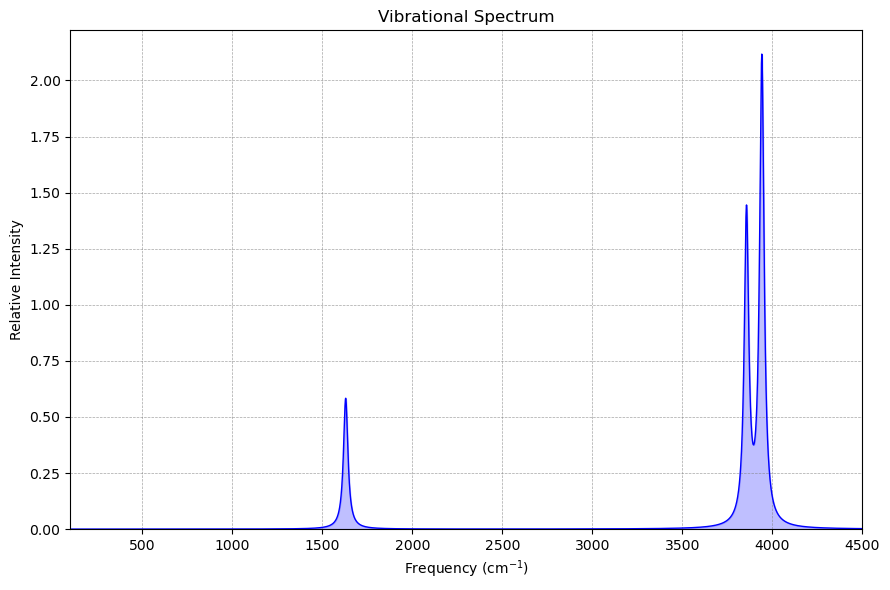

(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'Vibrational Spectrum'}, xlabel='Frequency (cm$^{-1}$)', ylabel='Relative Intensity'>)

In [9]:
# All parameters to the plot function are optional.
# The "save" parameter can be a file name (e.g. spectrum.png) to save the figure.
# The "sticks" boolean can be used to show the actual stick-spectrum in addition.
irobj.plot(color='b', linewidth=2, figsize=(9, 6), save=None, sticks=False, stickmarker='None')

This concludes the basic functions of `pyirtools`.

---

## Read-in example

In the same `example/` directory as this notebook, there are files `struc.xyz`, `numhess`, and `dipgrad`, which contain a molecule, its numerical Hessian and dipole gradient, respectively.

`pyirtools` can read these files and process them:

In [19]:
# Initialize empty irobj
irobj = IRtoolsCalculator()

# Read the files from the example directory
irobj.read(xyzfile='struc.xyz', hessfile='numhess', dipfile='dipgrad')

In [20]:
# Check if the structure was read correctly
print(irobj.atoms)

# ASE implements a simple interactive viewer for juypter notebooks, uncomment the next two lines to use
#from ase.visualize import view
#view(irobj.atoms, viewer='x3d')

Atoms(symbols='ClCOC3ClC3H4', pbc=False)


Having initialized `irobj` with these two lines, we can directly use the `plot` function to process it, which will execute all steps as above, ***except the normalization***.

For demo purposes we are choosing a different color and plot the stick spectrum as well:

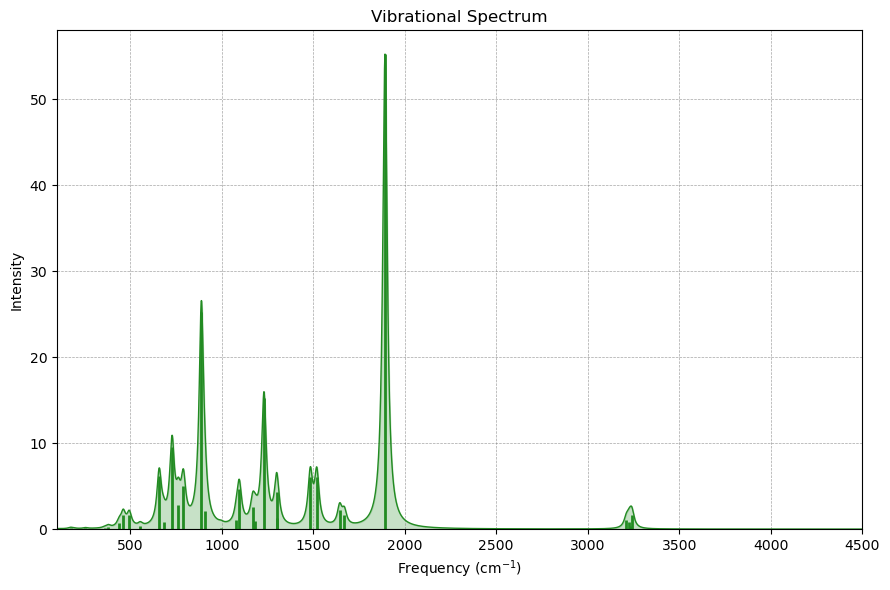

(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'Vibrational Spectrum'}, xlabel='Frequency (cm$^{-1}$)', ylabel='Intensity'>)

In [21]:
irobj.plot(color='forestgreen', sticks=True)

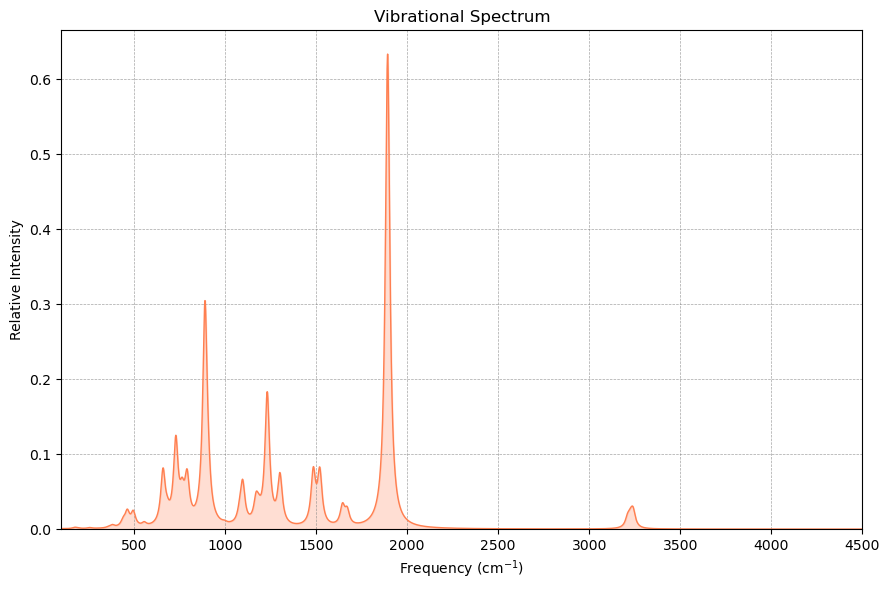

(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'Vibrational Spectrum'}, xlabel='Frequency (cm$^{-1}$)', ylabel='Relative Intensity'>)

In [22]:
# To normalize the spectrum, we can determine the normalization constant and replot
irobj.normalize()
irobj.plot(color='coral')
# Note the normalized y-axis and title

This concludes the read-in example of `pyirtools`

---